Enter your request in English, please.
boxing gloves

Ebay
Average price: 53.792456666666666 usd
Total number of people bought products from Ebay:  5085

--------------------------------------------------------------

Amazon
Average rate:  4.499999999999999
Average price: 80.68859999999991 usd
Number of people voted:  46998


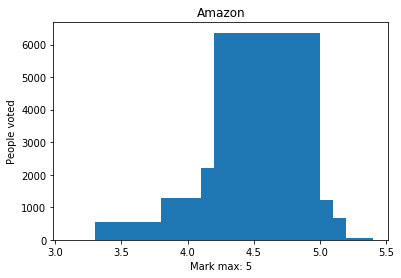

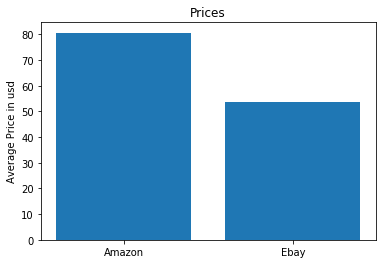

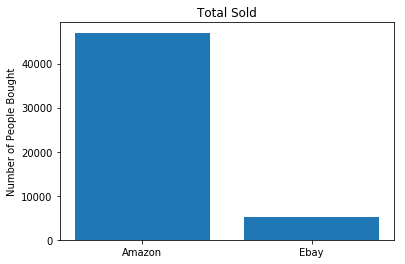

In [8]:
'''
This program requests an input from a user and searches user's needs in Amazon and Ebay.
Then it prints number of purchases and average prices of both websites.
Also, the program displays plots of prices and purchases in order to compare two online shops.

Important Note!!!
To run the program you have to download chromedriver
'''
import os,pathlib
import matplotlib.pyplot as plt
from selenium import webdriver
from bs4 import BeautifulSoup as soup
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException

# User's request
demand = input("Enter your request in English, please.\n")

# Set options
chrome_options = Options()
chrome_options.add_argument("--headless")

# Getting driver's path
cwd = pathlib.PureWindowsPath(os.getcwd()).as_posix() + "/chromedriver.exe"

# Ebay
# In case you do not want chrome to be visible just add this ", options=chrome_options" next to cwd
browser = webdriver.Chrome(cwd)#, options=chrome_options)
browser.get("https://www.ebay.ca/")
search_bar = WebDriverWait(browser, 10).until(EC.element_to_be_clickable((By.XPATH, "//input[@class='gh-tb ui-autocomplete-input']")))
for i in demand:
    search_bar.send_keys(i)
search_button = browser.find_element_by_xpath("//input[@class='btn btn-prim gh-spr']").click()

# Get html of the page
html2 = browser.page_source
sp2 = soup(html2, "html.parser")

# Get pages
pages2 = sp2.find("table",{"id":"Pagination"})
pages2 = pages2.find_all("a")
list_pages = []
for i in pages2:
    list_pages.append(i.get("href"))
list_pages.pop()
list_pages.pop(0)
# print(list_pages)
# 1 usd = 1.31 cad

flag = 0
counter = 0
count_pages = 1
# for page in list_pages:
#     counter += 1
    
result_list = sp2.find("ul",{"id":"ListViewInner"})
if result_list == None:
    result_list = sp2.find("ul",{"id":"GalleryViewInner"})
    flag = 1
    
result_list = result_list.find_all("li")
prev = ""

num_sold = []
prices = []

for page in list_pages:
    browser.get(page)
    WebDriverWait(browser, 10).until(EC.element_to_be_clickable((By.XPATH, "//input[@class='gh-tb ui-autocomplete-input']")))
    html2 = browser.page_source
    sp2 = soup(html2, "html.parser")
    if count_pages > 5:
        break
    if flag == 1:
        result_list = sp2.find("ul",{"id":"GalleryViewInner"})
        result_list = result_list.find_all("li")
        count_pages += 1
#         print("count_pages: ", count_pages)
#         print(result_list)
        for item in result_list:
            price = item.find("div",{"class":"prc conprices"})
            if price != None:
#                 x = price.find("span",{"class":" amt"})
#                 if x != None:
#                     for i in x:
#                         if i != None and i.string != None:
#                             print("X String: ",i.string)
                        
                price = price.find_all("span")
                if price != None:
                    for i in price:
                        if i != None and i.string != None and "Buy" not in i.string and "to" not in i.string and "Previous" not in i.string:
                            prices.append(float(i.string[3:]))

            sold = item.find("div",{"class":"hotness-GV bold"})
            if sold != None:
#                 print(sold)
                sold = item.find("div",{"class":"hotness-signal red"})
                if sold != None:
                    if "old" in sold.string: 
#                         print(sold.string.split(" ")[0][:-1])
                        a = sold.string.split(" ")[0]
                        string = a.split("\t\t\t\t\t")[1][:-1].split(",")
                        empty = ""
                        for s in string:
                            empty += s
                        num_sold.append(int(empty))
#                         prev = sold.string
    else:
        result_list = sp2.find("ul",{"id":"ListViewInner"})
        result_list = result_list.find_all("li")
        count_pages += 1
        for item in result_list:

            price = item.find("ul",{"class":"lvprices left space-zero conprices"})
            if price != None:
                price = price.find("li",{"class":"lvprice prc"})
                if price != None:
                    price = price.find("span",{"class":"prRange"})
                    if price != None:
            #             print(price)
                        for i in price:
                            if i.string != None:
                                counter += 1
                                if counter == 2:
    #                                 print(i.string)
                                    prices.append(float(i.string))
                                    counter = 0
                                    break

            sold = item.find("div",{"class":"hotness-signal red"})
            if sold != None:
                if sold.string != prev and "old" in sold.string: 
    #                 print(sold.string.split(" ")[0])
                    a = sold.string.split(" ")[0]
                    string = a.split("\t\t\t\t\t")[1][:-1].split(",")
                    empty = ""
                    for s in string:
                        empty += s
                    num_sold.append(int(empty))
                    prev = sold.string

# print(prices)
total_price2 = sum(prices)
total_buy2 = sum(num_sold)
average_price2 = total_price2/len(prices)
print("\nEbay")
print("Average price: {} usd".format(average_price2*0.77))
print("Total number of people bought products from Ebay: ",total_buy2)
print("\n--------------------------------------------------------------\n")
# browser2.close()


# Amazon
# browser = webdriver.Chrome(cwd)#, options=chrome_options)
browser.get("https://www.amazon.com/")
search_bar = WebDriverWait(browser, 10).until(EC.element_to_be_clickable((By.XPATH, "//input[@id='twotabsearchtextbox']")))
for i in demand:
    search_bar.send_keys(i)
search_button = browser.find_element_by_class_name("nav-input")
search_button.click()



pages = browser.page_source

sp = soup(pages, "html.parser")

bar = sp.find("div", {"class":"a-text-center"})
bar = bar.find_all("a")
pages = []
for i in bar:
    pages.append("https://www.amazon.com"+i.get("href"))
pages.pop()

# print(pages)
counter = 0


votes = []
people = []
ratings = []
prices = []
flag = 0
price = link1 = img = rating = people_voted = ""
for page in pages:
    browser.get(page)
    sp = soup(browser.page_source, "html.parser")
    result_list = sp.find("div",{"class":"s-result-list s-search-results sg-row"})
    
    people_voted = result_list.find_all("div",{"class":"a-row a-size-small"})
    
    price = result_list.find_all("a",{"class":"a-size-base a-link-normal a-text-normal"})
    for index in price:
        span = index.find_all("span")
        for i in span:
            string = i.find("span",{"class":"a-offscreen"})
            if string != None:
                prices.append(float(string.string[1:]))
                break
    
    for index in people_voted:
        span = index.find_all("span")
        for i in span:
            if i.string != None:
                people.append(i.string)


#browser.close()

for i in range(len(people)):
    if i%2==0:
        ratings.append(float(people[i].split(" ")[0]))
    else:
        empty = ""
        x = people[i].split(",")
        for part in x:
            empty += part
        votes.append(int(empty))

total_rating = sum(ratings)
total_people = sum(votes)
total_price = sum(prices)
average_ratings = total_rating/len(ratings)
average_price = total_price/len(prices)

print("Amazon")
print("Average rate: ", average_ratings)
print("Average price: {} usd".format(average_price))
print("Number of people voted: ",total_people)


# Charts & Reasoning
plt.bar(ratings,votes)
plt.title("Amazon")
plt.ylabel("People voted")
plt.xlabel("Mark max: 5")
plt.show()


a = []
b = ["Amazon","Ebay"]
a.append(average_price)
a.append(average_price2*0.77)
plt.bar(b,a)
plt.title("Prices")
plt.ylabel("Average Price in usd")
plt.show()

a = []
a.append(total_people)
a.append(total_buy2)
plt.bar(b,a)
plt.title("Total Sold")
plt.ylabel("Number of People Bought")
plt.show()


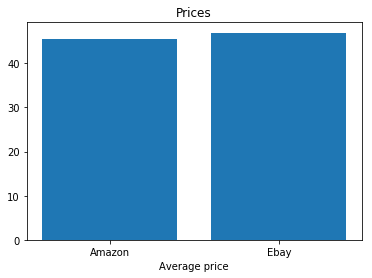

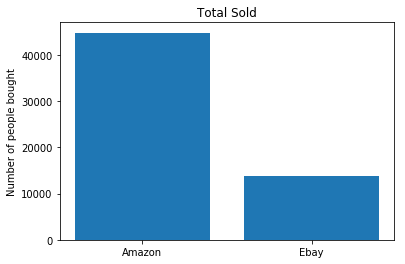

In [17]:
a = []
b = ["Amazon","Ebay"]
a.append(average_price)
a.append(average_price2*0.77)
plt.bar(b,a)
plt.title("Prices")
plt.xlabel("Average price")
plt.show()

a = []
a.append(total_people)
a.append(total_buy2)
plt.bar(b,a)
plt.title("Total Sold")
plt.ylabel("Number of people bought")
plt.show()

In [2]:
print(list_pages)

['https://www.ebay.ca/sch/i.html?_from=R40&_sacat=0&_nkw=T-shirts&rt=nc', 'https://www.ebay.ca/sch/i.html?_from=R40&_sacat=0&_nkw=T-shirts&_pgn=2&_skc=48&rt=nc', 'https://www.ebay.ca/sch/i.html?_from=R40&_sacat=0&_nkw=T-shirts&_pgn=3&_skc=96&rt=nc', 'https://www.ebay.ca/sch/i.html?_from=R40&_sacat=0&_nkw=T-shirts&_pgn=4&_skc=144&rt=nc', 'https://www.ebay.ca/sch/i.html?_from=R40&_sacat=0&_nkw=T-shirts&_pgn=5&_skc=192&rt=nc']


In [7]:
print(price)

[]
